In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
file_path = "experiment_results_steghide.csv"
data = pd.read_csv(file_path)

# Filtering the data so we only use the bike images
data = data[data['Image'].str.contains('bike')]

# Display basic information about the DataFrame
print("Basic Information:")
print(data.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Display the first few rows of the DataFrame
print("\nFirst Few Rows:")
print(data.head())

# Analyze specific columns
print("\nData Size (bytes) Statistics:")
print("Mean:", data['Data Size (bytes)'].mean())
print("Median:", data['Data Size (bytes)'].median())
print("Maximum:", data['Data Size (bytes)'].max())
print("Minimum:", data['Data Size (bytes)'].min())

print("\nPSNR Statistics:")
print("Mean:", data['PSNR'].mean())
print("Median:", data['PSNR'].median())
print("Maximum:", data['PSNR'].max())
print("Minimum:", data['PSNR'].min())

print("\nSSIM Statistics:")
print("Mean:", data['SSIM'].mean())
print("Median:", data['SSIM'].median())
print("Maximum:", data['SSIM'].max())
print("Minimum:", data['SSIM'].min())

# Analyze categorical columns
print("\nData Integrity Counts:")
print(data['Data Integrity'].value_counts())

print("\nImages Match Counts:")
print(data['Images Match'].value_counts())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Image              1460 non-null   object 
 1   Image_size         1460 non-null   int64  
 2   Data Size (bytes)  1460 non-null   int64  
 3   Ratio              1460 non-null   int64  
 4   PSNR               1460 non-null   float64
 5   SSIM               1460 non-null   float64
 6   Data Integrity     1460 non-null   bool   
 7   Images Match       1460 non-null   bool   
dtypes: bool(2), float64(2), int64(3), object(1)
memory usage: 82.7+ KB
None

Summary Statistics for Numerical Columns:
       Image_size  Data Size (bytes)        Ratio         PSNR         SSIM
count      1460.0        1460.000000  1460.000000  1460.000000  1460.000000
mean     921654.0       23041.000000     2.500000    52.796856     0.997696
std           0.0       10308.002806     1.118417   

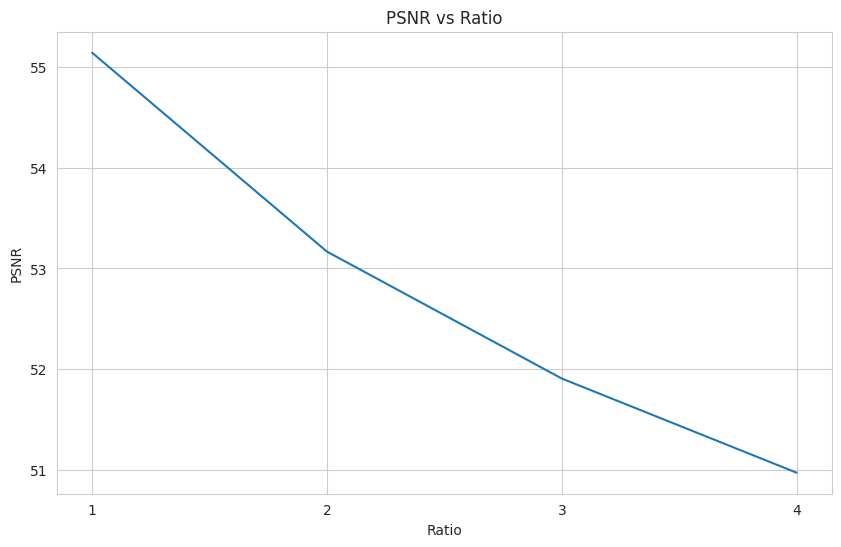

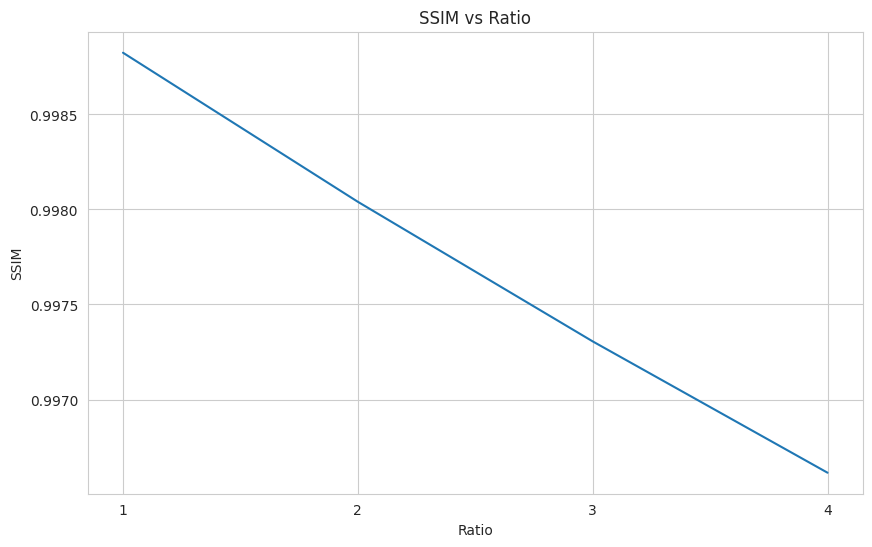

PSNR Summary Statistics:
       count       mean       std        min        25%        50%        75%  \
Ratio                                                                           
1      365.0  55.137637  3.061071  50.451470  52.850845  53.896496  57.887563   
2      365.0  53.166443  3.286185  47.995693  50.669817  51.672086  56.653028   
3      365.0  51.908335  3.395498  46.415615  49.326228  50.249990  55.775278   
4      365.0  50.975009  3.458673  45.266276  48.378780  49.289036  55.064227   

             max  
Ratio             
1      62.648717  
2      60.005514  
3      58.345985  
4      57.142669  

SSIM Summary Statistics:
       count      mean       std       min       25%       50%       75%  \
Ratio                                                                      
1      365.0  0.998825  0.000804  0.994040  0.998343  0.999052  0.999460   
2      365.0  0.998040  0.001470  0.988442  0.997185  0.998465  0.999191   
3      365.0  0.997306  0.002099  0.983615  

In [22]:
# Set the style of seaborn
sns.set_style("whitegrid")

df = data

# Plot PSNR against different ratios
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Ratio', y='PSNR', errorbar=None)
plt.title('PSNR vs Ratio')
plt.xlabel('Ratio')
plt.ylabel('PSNR')
plt.xticks(df['Ratio'].unique())  # Ensure all ratios are shown on the x-axis
plt.grid(True)
plt.show()

# Plot SSIM against different ratios
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Ratio', y='SSIM', errorbar=None)
plt.title('SSIM vs Ratio')
plt.xlabel('Ratio')
plt.ylabel('SSIM')
plt.xticks(df['Ratio'].unique())  # Ensure all ratios are shown on the x-axis
plt.grid(True)
plt.show()

# Calculate summary statistics
psnr_summary = df.groupby('Ratio')['PSNR'].describe()
ssim_summary = df.groupby('Ratio')['SSIM'].describe()

print("PSNR Summary Statistics:")
print(psnr_summary)
print("\nSSIM Summary Statistics:")
print(ssim_summary)


In [23]:
from scipy.stats import f_oneway


# Conducting statistical test ANOVA to determine if there are significant differences in PSNR and SSIM across different ratios.


# Perform ANOVA for PSNR and SSIM across different ratios
anova_psnr = f_oneway(*[group['PSNR'] for name, group in df.groupby('Ratio')])
anova_ssim = f_oneway(*[group['SSIM'] for name, group in df.groupby('Ratio')])

print("ANOVA results for PSNR:")
print("F-statistic:", anova_psnr.statistic)
print("p-value:", anova_psnr.pvalue)

print("\nANOVA results for SSIM:")
print("F-statistic:", anova_ssim.statistic)
print("p-value:", anova_ssim.pvalue)


ANOVA results for PSNR:
F-statistic: 108.39338758114255
p-value: 2.4096085650033526e-63

ANOVA results for SSIM:
F-statistic: 91.47342662528295
p-value: 3.108618847420775e-54
